In [0]:
# automatically update imports
%load_ext autoreload
%autoreload 2

# snippet for relative imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [64]:
# BASE IMPORTS
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

import utils

In [82]:
dframe = utils.load_data_frame(utils.GPCI_FLAG, utils.ALL_CITIES)

In [83]:
sprawl_related_indicators = [
    # MORPHOLOGY
    'level green coverage',
    'population density',
    # ENVIRONMENT
    'water quality',
    # 'percentage renewable energy used',
    'density sulfur dioxide (so2) density nitrogen dioxide (no2)',
    'density suspended particulate matter (spm)'
    'co2 emissions',
    # PUBLIC TRANSPORT
    'punctuality coverage public transportation',
    'density railway stations',
    'commuting convenience'
    # OTHER
    # 'price level',
]
dframe_tr = dframe[public_transport_indicators]

In [84]:
# build the dataframe with averaged values for each indicator over the years
dframe_avg = DataFrame()
for col in dframe_tr.columns:
    dframe_avg[col] = dframe_tr[col].map(Series.mean)

In [85]:
# Imputing missing values
from sklearn import preprocessing
imp = preprocessing.Imputer(missing_values='NaN', strategy='mean')
data = imp.fit_transform(dframe_red.values)

For k = 3 silhouette_avg = 0.200395072433
For k = 4 silhouette_avg = 0.180292133575
For k = 5 silhouette_avg = 0.119925709099


For k = 6 silhouette_avg = 0.138296223098
For k = 7 silhouette_avg = 0.121412903691
For k = 8 silhouette_avg = 0.169549813625


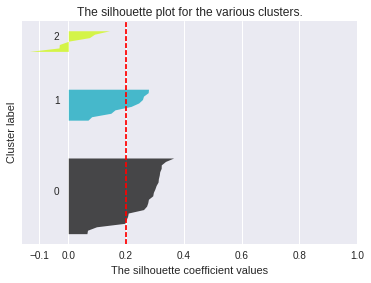

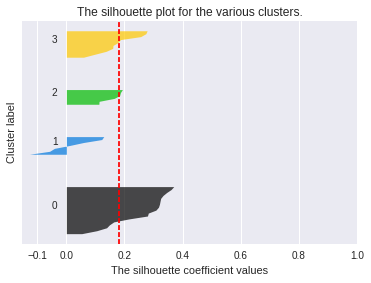

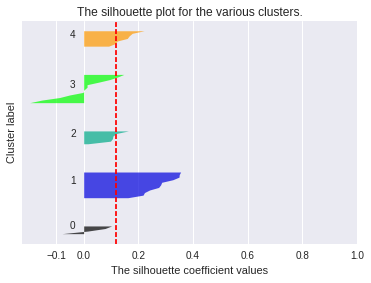

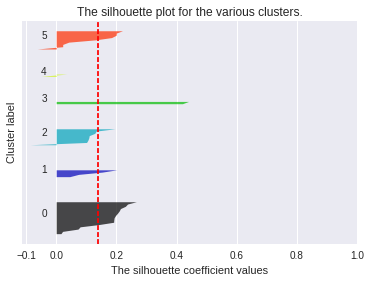

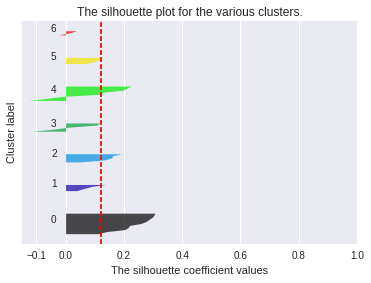

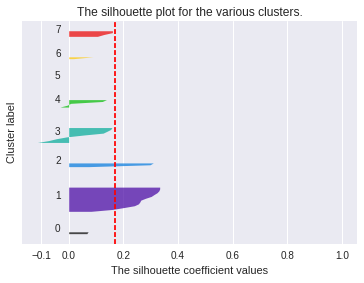

In [86]:
# CLUSTERING
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

k_range = range(3,9)

for k in k_range:
    k_means = KMeans(n_clusters=k)
    cluster_labels = k_means.fit_predict(data)

    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For k =", k, "silhouette_avg =", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, color=color, alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        
    # color = cm.spectral(cluster_labels.astype(np.float) / k)

    # fig, axes = plt.subplots(4,4, figsize=(20,20))

    # for i, indicator_i in enumerate(most_var):
    #     for j, indicator_j in enumerate(most_var):
    #         if i < j:
    #             axes[i][j-1].scatter(data[:, dframe_red.columns.get_loc(indicator_i)], data[:, dframe_red.columns.get_loc(indicator_j)], c=color)
    # plt.show()

In [87]:
def dict_from_cluster_labels(cluster_labels):
    clusters = {}
    for i in range(k):
        clusters[i] = []
    for j, label in enumerate(cluster_labels):
        clusters[label].append(dframe_red.index[j])
    return clusters

In [88]:
# LET'S TRY WITH k=3, k=7

k = 4
k_means = KMeans(n_clusters=k, n_init=1000)
cluster_labels = k_means.fit_predict(data)
clusters = dict_from_cluster_labels(cluster_labels)
print(clusters)

{0: ['amsterdam', 'barcelona', 'berlin', 'brussels', 'copenhagen', 'frankfurt', 'fukuoka', 'geneva', 'madrid', 'milan', 'osaka', 'stockholm', 'vancouver', 'vienna', 'zurich'], 1: ['london', 'new york', 'paris', 'seoul', 'singapore', 'tokyo'], 2: ['bangkok', 'beijing', 'cairo', 'hong kong', 'istanbul', 'kuala lumpur', 'mexico city', 'mumbai', 'sao paulo', 'shanghai', 'taipei'], 3: ['boston', 'chicago', 'los angeles', 'moscow', 'san francisco', 'sydney', 'toronto', 'washington d.c.']}
